In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
train['make'] = train['make'].apply(lambda x: str(x))
train['area_2'] = train['turning_radius'].apply(lambda x: 3.1416*x*x)
train['weight_per_lenght'] = train['gross_weight'] / train['length']
train['torque'] = train['max_torque'].apply(lambda x: float(x.split('@')[0][:-2]))
train['torque_rpm'] = train['max_torque'].apply(lambda x: float(x.split('@')[1][:-3]))
train['hp'] =  train['max_power'].apply(lambda x: float(x.split('@')[0][:-3]))
train['hp_rpm'] =  train['max_power'].apply(lambda x: float(x.split('@')[1][:-3]))
train['age_of_car'] = train['age_of_car'] * 10
train['age_of_policyholder'] = train['age_of_policyholder'] * 100
train['area'] = (train['length'] * train['width'] * train['height'])/1000000

In [5]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train['area_cluster']=encoder.fit_transform(train['area_cluster'])
train['model']=encoder.fit_transform(train['model'])
train['segment']=encoder.fit_transform(train['segment'])

In [6]:
train.drop(['policy_id','max_torque', 'max_power'], axis = 1, inplace=True)
train = pd.get_dummies(train,train.columns[train.dtypes == 'object'], drop_first=True)

In [8]:
train['gear_box_hp'] = train['hp']/ train['gear_box']
train['lk_engine_hp'] = train['hp'] * train['engine_type_1.2 L K Series Engine']
train['cly_gb'] = train['cylinder'] * train['gear_box']
train['age_hp'] = train['hp']/ (train['age_of_car']+1)
train['sa_pd_fl'] = train['is_parking_sensors_Yes'] + train['is_power_door_locks_Yes'] + train['is_front_fog_lights_Yes']
train['weight_per_area'] = train['gross_weight']/ train['area']
train['model_agd'] = train['model'] + train['age_of_car']
train['ml_is'] = train['is_brake_assist_Yes'] + train['is_central_locking_Yes'] + train['is_rear_window_defogger_Yes'] + train['is_driver_seat_height_adjustable_Yes']
train['model_displacement'] = train['model'] * train['displacement']
train['model_ag_i'] = train['model_agd'] + train['is_esc_Yes']
train['cly_gb_DTEC'] = train['cly_gb'] * train['engine_type_i-DTEC']
train['ab_gb'] = train['airbags'] * train['gear_box']
train['age_area'] = train['age_of_car'] * train['area_cluster']
train['age_T'] = train['torque'] / (train['age_of_car']+1)
train['rmp_torque'] = train['torque_rpm'] / train['torque']
train['cly_hp'] = train['hp'] / train['cylinder']
train['cly_gb'] = train['hp'] / train['gear_box']
train['dis_gb'] = train['displacement'] / train['gear_box']
train['e_as_tp_ps_pc'] = train['is_esc_Yes'] + train['is_adjustable_steering_Yes'] + train['is_tpms_Yes'] + train['is_parking_sensors_Yes'] + train['is_parking_camera_Yes']
train['b_t_s'] = train['rear_brakes_type_Drum'] + train['transmission_type_Manual'] + train['transmission_type_Manual']
train['sa_ec'] = train['is_speed_alert_Yes'] + train['is_ecw_Yes'] + train['is_day_night_rear_view_mirror_Yes'] + train['is_driver_seat_height_adjustable_Yes'] + train['is_power_steering_Yes']
train['lc_pd_ba'] = train['is_central_locking_Yes'] + train['is_power_door_locks_Yes'] + train['is_brake_assist_Yes'] + train['is_rear_window_defogger_Yes']
print(train.shape)
train.head()

(58592, 83)


,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,segment,model,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim,area_2,weight_per_lenght,torque,torque_rpm,hp,hp_rpm,area,make_2,make_3,make_4,make_5,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,gear_box_hp,lk_engine_hp,cly_gb,age_hp,sa_pd_fl,weight_per_area,model_agd,ml_is,model_displacement,model_ag_i,cly_gb_DTEC,ab_gb,age_area,age_T,rmp_torque,cly_hp,dis_gb,e_as_tp_ps_pc,b_t_s,sa_ec,lc_pd_ba
0,0.515874,0.5,64.423077,0,4990,0,0,2,796,3,5,4.6,3445,1515,1475,1185,0,0,66.476256,0.343977,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,8.072,0.0,8.072,26.906667,1,0.153930,0.5,0,0,0.5,0,10,0.0,40.000000,58.333333,13.453333,159.2,1,3,2,0
1,0.672619,0.2,37.500000,11,27003,0,0,2,796,3,5,4.6,3445,1515,1475,1185,0,0,66.476256,0.343977,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,8.072,0.0,8.072,33.633333,1,0.153930,0.2,0,0,0.2,0,10,2.2,50.000000,58.333333,13.453333,159.2,1,3,2,0
2,0.841110,0.2,38.461538,15,4076,0,0,2,796,3,5,4.6,3445,1515,1475,1185,0,0,66.476256,0.343977,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,8.072,0.0,8.072,33.633333,1,0.153930,0.2,0,0,0.2,0,10,3.0,50.000000,58.333333,13.453333,159.2,1,3,2,0
3,0.900277,1.1,43.269231,16,21622,3,3,2,1197,4,5,4.8,3995,1735,1515,1335,2,0,72.382464,0.334168,113.0,4400.0,88.50,6000.0,10500.957375,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,1,1,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,17.700,0.0,17.700,42.142857,3,0.127131,4.1,4,3591,5.1,0,10,17.6,53.809524,38.938053,22.125000,239.4,4,1,5,4
4,0.596403,1.1,63.461538,17,34738,0,4,2,999,3,5,5.0,3731,1579,1490,1155,2,0,78.540000,0.309568,91.0,4250.0,67.06,5500.0,8777.961010,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,13.412,0.0,13.412,31.933333,1,0.131580,5.1,1,3996,5.1,0,10,18.7,43.333333,46.703297,22.353333,199.8,1,1,4,2


In [9]:
# train.describe().T

In [10]:
from sklearn.feature_selection import mutual_info_regression

# mutual info regression scores
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [11]:
x = train.drop('is_claim',  axis = 1)
y = train['is_claim']

In [12]:
# make_mi_scores(x, y)

In [13]:
x.shape, y.shape

((58592, 82), (58592,))

In [14]:
# feature selection
from sklearn.feature_selection import SelectKBest, chi2
selector = SelectKBest(chi2, k=25)
x = selector.fit_transform(x, y)


In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 31)

In [16]:
from imblearn.combine import SMOTEENN 

sme = SMOTEENN(random_state=42)
x_somteenn, y_somteenn = sme.fit_resample(x_train, y_train)

In [17]:
x_somteenn.shape

(51322, 25)

0.6837110868377936
              precision    recall  f1-score   support

           0       0.95      0.70      0.81     13742
           1       0.10      0.49      0.16       906

    accuracy                           0.68     14648
   macro avg       0.52      0.59      0.48     14648
weighted avg       0.90      0.68      0.77     14648



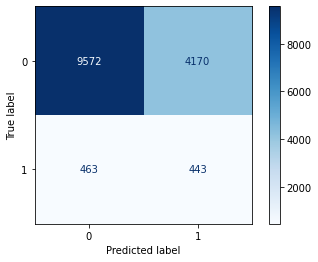

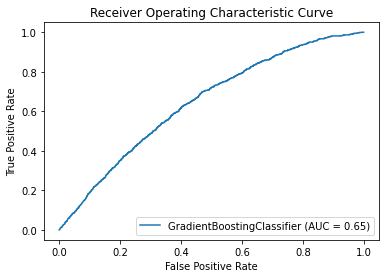

In [18]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_confusion_matrix

gbc = GradientBoostingClassifier()
gbc.fit(x_somteenn, y_somteenn)
gbc_score = gbc.score(x_test, y_test)
print(gbc_score)

y_preds = gbc.predict(x_test)
print(classification_report(y_test, y_preds))
plot_confusion_matrix(gbc, x_test, y_test, cmap=plt.cm.Blues)
plot_roc_curve(gbc, x_test, y_test)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve');

In [19]:
# from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
# gbc_grid = {'loss': ['deviance', 'exponential'],
#             'learning_rate': [0.1,0.01],
#             'n_estimators': [100, 200, 500, 1000],
#             'min_samples_split': [2, 4, 6, 8],
#             'min_samples_leaf': [1, 2, 3, 5],
#             'max_depth': [1, 2, 3]}


# gbc_clf = GridSearchCV(GradientBoostingClassifier(),
#                       param_grid = gbc_grid,
#                            cv=2,
#                            verbose=True)
# gbc_clf.fit(x_somteenn, y_somteenn)
# gbc_clf.score(x_test, y_test)
# gbc_clf.best_params_

In [20]:
test.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating
0,ID58593,0.341732,0.00,0.586538,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
1,ID58594,0.307241,0.13,0.442308,C8,8794,1,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,2,No,Yes,No,Yes,No,Drum,1197,4,Manual,5,Electric,4.8,3845,1735,1530,1335,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2
2,ID58595,0.327924,0.12,0.451923,C8,8794,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2
3,ID58596,0.782654,0.01,0.461538,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0
4,ID58597,1.233404,0.02,0.634615,C5,34738,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0


In [21]:
test['area_cluster']=encoder.fit_transform(test['area_cluster'])
test['model']=encoder.fit_transform(test['model'])
test['segment']=encoder.fit_transform(test['segment'])
test['make'] = test['make'].apply(lambda x: str(x))
test['area_2'] = test['turning_radius'].apply(lambda x: 3.1416*x*x)
test['weight_per_lenght'] = test['gross_weight'] / test['length']
test['torque'] = test['max_torque'].apply(lambda x: float(x.split('@')[0][:-2]))
test['torque_rpm'] = test['max_torque'].apply(lambda x: float(x.split('@')[1][:-3]))
test['hp'] =  test['max_power'].apply(lambda x: float(x.split('@')[0][:-3]))
test['hp_rpm'] =  test['max_power'].apply(lambda x: float(x.split('@')[1][:-3]))
test['age_of_car'] = test['age_of_car'] * 10
test['age_of_policyholder'] = test['age_of_policyholder'] * 100
test['area'] = (test['length'] * test['width'] * test['height'])/1000000
test.drop(['policy_id','max_torque', 'max_power'], axis = 1, inplace=True)

In [22]:
test = pd.get_dummies(test,test.columns[test.dtypes == 'object'], drop_first=True)

test['gear_box_hp'] = test['hp']/ test['gear_box']
test['lk_engine_hp'] = test['hp'] * test['engine_type_1.2 L K Series Engine']
test['cly_gb'] = test['cylinder'] * test['gear_box']
test['age_hp'] = test['hp']/ (test['age_of_car']+1)
test['sa_pd_fl'] = test['is_parking_sensors_Yes'] + test['is_power_door_locks_Yes'] + test['is_front_fog_lights_Yes']
test['weight_per_area'] = test['gross_weight']/ test['area']
test['model_agd'] = test['model'] + test['age_of_car']
test['ml_is'] = test['is_brake_assist_Yes'] + test['is_central_locking_Yes'] + test['is_rear_window_defogger_Yes'] + test['is_driver_seat_height_adjustable_Yes']
test['model_displacement'] = test['model'] * test['displacement']
test['model_ag_i'] = test['model_agd'] + test['is_esc_Yes']
test['cly_gb_DTEC'] = test['cly_gb'] * test['engine_type_i-DTEC']
test['ab_gb'] = test['airbags'] * test['gear_box']
test['age_area'] = test['age_of_car'] * test['area_cluster']
test['age_T'] = test['torque'] / (test['age_of_car']+1)
test['rmp_torque'] = test['torque_rpm'] / test['torque']
test['cly_hp'] = test['hp'] / test['cylinder']
test['cly_gb'] = test['hp'] / test['gear_box']
test['dis_gb'] = test['displacement'] / test['gear_box']
test['e_as_tp_ps_pc'] = test['is_esc_Yes'] + test['is_adjustable_steering_Yes'] + test['is_tpms_Yes'] + test['is_parking_sensors_Yes'] + test['is_parking_camera_Yes']
test['b_t_s'] = test['rear_brakes_type_Drum'] + test['transmission_type_Manual'] + test['transmission_type_Manual']
test['sa_ec'] = test['is_speed_alert_Yes'] + test['is_ecw_Yes'] + test['is_day_night_rear_view_mirror_Yes'] + test['is_driver_seat_height_adjustable_Yes'] + test['is_power_steering_Yes']
test['lc_pd_ba'] = test['is_central_locking_Yes'] + test['is_power_door_locks_Yes'] + test['is_brake_assist_Yes'] + test['is_rear_window_defogger_Yes']
print(test.shape)
test.head()

(39063, 82)


,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,segment,model,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,area_2,weight_per_lenght,torque,torque_rpm,hp,hp_rpm,area,make_2,make_3,make_4,make_5,fuel_type_Diesel,fuel_type_Petrol,engine_type_1.2 L K Series Engine,engine_type_1.2 L K12N Dualjet,engine_type_1.5 L U2 CRDi,engine_type_1.5 Turbocharged Revotorq,engine_type_1.5 Turbocharged Revotron,engine_type_F8D Petrol Engine,engine_type_G12B,engine_type_K Series Dual jet,engine_type_K10C,engine_type_i-DTEC,is_esc_Yes,is_adjustable_steering_Yes,is_tpms_Yes,is_parking_sensors_Yes,is_parking_camera_Yes,rear_brakes_type_Drum,transmission_type_Manual,steering_type_Manual,steering_type_Power,is_front_fog_lights_Yes,is_rear_window_wiper_Yes,is_rear_window_washer_Yes,is_rear_window_defogger_Yes,is_brake_assist_Yes,is_power_door_locks_Yes,is_central_locking_Yes,is_power_steering_Yes,is_driver_seat_height_adjustable_Yes,is_day_night_rear_view_mirror_Yes,is_ecw_Yes,is_speed_alert_Yes,gear_box_hp,lk_engine_hp,cly_gb,age_hp,sa_pd_fl,weight_per_area,model_agd,ml_is,model_displacement,model_ag_i,cly_gb_DTEC,ab_gb,age_area,age_T,rmp_torque,cly_hp,dis_gb,e_as_tp_ps_pc,b_t_s,sa_ec,lc_pd_ba
0,0.341732,0.0,58.653846,15,4076,0,0,2,796,3,5,4.6,3445,1515,1475,1185,0,66.476256,0.343977,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,8.072,0.0,8.072,40.360000,1,0.153930,0.0,0,0,0.0,0,10,0.0,60.000000,58.333333,13.453333,159.2,1,3,2,0
1,0.307241,1.3,44.230769,20,8794,2,7,2,1197,4,5,4.8,3845,1735,1530,1335,2,72.382464,0.347204,113.0,4400.0,88.50,6000.0,10206.744750,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,1,1,1,1,1,1,1,1,17.700,0.0,17.700,38.478261,3,0.130796,8.3,3,8379,8.3,0,10,26.0,49.130435,38.938053,22.125000,239.4,2,3,5,3
2,0.327924,1.2,45.192308,20,8794,0,4,2,999,3,5,5.0,3731,1579,1490,1155,2,78.540000,0.309568,91.0,4250.0,67.06,5500.0,8777.961010,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,13.412,0.0,13.412,30.481818,1,0.131580,5.2,1,3996,5.2,0,10,24.0,41.363636,46.703297,22.353333,199.8,1,1,4,2
3,0.782654,0.1,46.153846,17,34738,0,0,2,796,3,5,4.6,3445,1515,1475,1185,0,66.476256,0.343977,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,8.072,0.0,8.072,36.690909,1,0.153930,0.1,0,0,0.1,0,10,1.7,54.545455,58.333333,13.453333,159.2,1,3,2,0
4,1.233404,0.2,63.461538,17,34738,0,0,2,796,3,5,4.6,3445,1515,1475,1185,0,66.476256,0.343977,60.0,3500.0,40.36,6000.0,7698.283125,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,8.072,0.0,8.072,33.633333,1,0.153930,0.2,0,0,0.2,0,10,3.4,50.000000,58.333333,13.453333,159.2,1,3,2,0


In [23]:
test = selector.transform(test)

In [24]:
preds = gbc.predict(test)
preds

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [25]:
sub = pd.read_csv('sample_submission_KvRh9Sx.csv')
sub['is_claim'] = preds
sub.to_csv('submission_final.csv', index=False)
sub.head()

,policy_id,is_claim
0,ID58593,1
1,ID58594,0
2,ID58595,0
3,ID58596,0
4,ID58597,0
